In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path = "/home/aman/Documents/Project/DepthCal/finalData/"

videoLeft = path+"videoLeft/"
videoRight = path + "videoRight/"

In [3]:
li = os.listdir(videoLeft)
li.sort()

In [4]:
yoloFiles = '/home/aman/Documents/Project/DepthCal/Code/Tiny Yolo Files/'

net = cv2.dnn.readNet(yoloFiles + 'yolov3-tiny.weights',yoloFiles + 'yolov3-tiny.cfg')
classes = []
with open(yoloFiles + 'coco.names','r') as f:
    classes = [line.strip() for line in f.readlines()]

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0]-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255,size = (len(classes),3))

In [5]:
def objectDetection(img):
    li = []
    w = 0
    height,width,channels = img.shape
    blob = cv2.dnn.blobFromImage(img,.00392,(416,416), (0,0,0),True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []

    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence>.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)

                w = int(detection[2] * width)
                h = int(detection[3] * height)

                x0 = int(center_x - (w / 2))
                x1 = x0 + w

                y0 = int(center_y - (h / 2))
                y1 = y0 + h
                confidences.append(float(confidence))
                class_ids.append(class_id)
                
                if x0 < 0:
                    x0 = 0
                if x1 > width:
                    x1 = width
                if y0 < 0:
                    y0 = 0
                if y1 > height:
                    y1 = height
    if w>0:
        li = [x0, y0, x1, y1]
        
    return li

In [6]:
def orb(imgL, imgR):
    #matchingMatch = []
    disp = []
    orb = cv2.ORB_create()

    kpL, desL = orb.detectAndCompute(imgL, None)
    kpR, desR = orb.detectAndCompute(imgR, None)
    
    liL = objectDetection(imgL)
    liR = objectDetection(imgR)
    
    if(len(liL)>0 and len(liR)>0):
    
        bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)
        matches = bf.match(desL, desR)

        for mat in matches:
            imgL_idx = mat.queryIdx
            imgR_idx = mat.trainIdx
            (xL,yL) = kpL[imgL_idx].pt
            (xR,yR) = kpR[imgR_idx].pt

            if (xL>=liL[0] and xL<=liL[2]) and (yL>=liL[1] and yL<=liL[3]):
                if(xR>=liR[0] and xR<=liR[2]) and (yR>=liR[1] and yR<=liR[3]):
                    disp.append(abs(xR-xL))
                    #matchingMatch.append(mat)
                    
        if(len(disp)>0):
            dis = sum(disp)/len(disp)

            #matchingMatch = sorted(matchingMatch, key = lambda x:x.distance)
            #print(len(matchingMatch))
            #matching_result = cv2.drawMatches(imgL, kpL, imgR, kpR, matchingMatch, None)

            #cv2.rectangle(imgL, (liL[0], liL[1]), (liL[2], liL[3]), (255, 255, 255), 10)
            #cv2.imshow("Matching Result", matching_result)

            #cv2.waitKey(0)
            #cv2.destroyAllWindows()

            return dis
    
    return 0

In [7]:
dispDist = []

for i in range(450, 660):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 3})
            
for i in range(900, 1050):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 5})
            
for i in range(1260, 1440):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 7})
            
for i in range(1680, 1800):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 9})
            
for i in range(1950, 2160):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 11})
            
for i in range(2400, 2550):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 13})
            
for i in range(2850, 3000):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 15})
            
for i in range(3300, 3450):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 17})
            
for i in range(3780, 3960):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 19})
            
for i in range(4110, 4350):
    for j in range(len(li)):
        if int(li[j][:-4]) == i:
            print(li[j])
            imgL = cv2.imread(videoLeft + li[j])
            imgR = cv2.imread(videoRight + li[j])
            
            imgL = cv2.resize(imgL, (480, 720))
            imgR = cv2.resize(imgR, (480, 720))
            
            dis = orb(imgL, imgR)
            if dis>0:
                dispDist.append({"Disparity" : dis, "Distance" : 20})

450.jpg
451.jpg
452.jpg
453.jpg
454.jpg
455.jpg
456.jpg
457.jpg
458.jpg
459.jpg
460.jpg
461.jpg
462.jpg
463.jpg
464.jpg
465.jpg
466.jpg
467.jpg
468.jpg
469.jpg
470.jpg
471.jpg
472.jpg
473.jpg
474.jpg
475.jpg
476.jpg
477.jpg
478.jpg
479.jpg
480.jpg
481.jpg
482.jpg
483.jpg
484.jpg
485.jpg
486.jpg
487.jpg
488.jpg
489.jpg
490.jpg
491.jpg
492.jpg
493.jpg
494.jpg
495.jpg
496.jpg
497.jpg
498.jpg
499.jpg
500.jpg
501.jpg
502.jpg
503.jpg
504.jpg
505.jpg
506.jpg
507.jpg
508.jpg
509.jpg
510.jpg
511.jpg
512.jpg
513.jpg
514.jpg
515.jpg
516.jpg
517.jpg
518.jpg
519.jpg
520.jpg
521.jpg
522.jpg
523.jpg
524.jpg
525.jpg
526.jpg
527.jpg
528.jpg
529.jpg
530.jpg
531.jpg
532.jpg
533.jpg
534.jpg
535.jpg
536.jpg
537.jpg
538.jpg
539.jpg
540.jpg
541.jpg
542.jpg
543.jpg
544.jpg
545.jpg
546.jpg
547.jpg
548.jpg
549.jpg
550.jpg
551.jpg
552.jpg
553.jpg
554.jpg
555.jpg
556.jpg
557.jpg
558.jpg
559.jpg
560.jpg
561.jpg
562.jpg
563.jpg
564.jpg
565.jpg
566.jpg
567.jpg
568.jpg
569.jpg
570.jpg
571.jpg
572.jpg
573.jpg
574.jpg


2475.jpg
2476.jpg
2477.jpg
2478.jpg
2479.jpg
2480.jpg
2481.jpg
2482.jpg
2483.jpg
2484.jpg
2485.jpg
2486.jpg
2487.jpg
2488.jpg
2489.jpg
2490.jpg
2491.jpg
2492.jpg
2493.jpg
2494.jpg
2495.jpg
2496.jpg
2497.jpg
2498.jpg
2499.jpg
2500.jpg
2501.jpg
2502.jpg
2503.jpg
2504.jpg
2505.jpg
2506.jpg
2507.jpg
2508.jpg
2509.jpg
2510.jpg
2511.jpg
2512.jpg
2513.jpg
2514.jpg
2515.jpg
2516.jpg
2517.jpg
2518.jpg
2519.jpg
2520.jpg
2521.jpg
2522.jpg
2523.jpg
2524.jpg
2525.jpg
2526.jpg
2527.jpg
2528.jpg
2529.jpg
2530.jpg
2531.jpg
2532.jpg
2533.jpg
2534.jpg
2535.jpg
2536.jpg
2537.jpg
2538.jpg
2539.jpg
2540.jpg
2541.jpg
2542.jpg
2543.jpg
2544.jpg
2545.jpg
2546.jpg
2547.jpg
2548.jpg
2549.jpg
2850.jpg
2851.jpg
2852.jpg
2853.jpg
2854.jpg
2855.jpg
2856.jpg
2857.jpg
2858.jpg
2859.jpg
2860.jpg
2861.jpg
2862.jpg
2863.jpg
2864.jpg
2865.jpg
2866.jpg
2867.jpg
2868.jpg
2869.jpg
2870.jpg
2871.jpg
2872.jpg
2873.jpg
2874.jpg
2875.jpg
2876.jpg
2877.jpg
2878.jpg
2879.jpg
2880.jpg
2881.jpg
2882.jpg
2883.jpg
2884.jpg
2885.jpg
2

In [8]:
dispDist

[{'Disparity': 101.32627573320943, 'Distance': 3},
 {'Disparity': 99.89978557385896, 'Distance': 3},
 {'Disparity': 97.95475573058522, 'Distance': 3},
 {'Disparity': 99.21339591344197, 'Distance': 3},
 {'Disparity': 100.28825580830477, 'Distance': 3},
 {'Disparity': 101.01634745695154, 'Distance': 3},
 {'Disparity': 100.3309347970145, 'Distance': 3},
 {'Disparity': 100.27113117418791, 'Distance': 3},
 {'Disparity': 100.28155666848888, 'Distance': 3},
 {'Disparity': 98.78467536218388, 'Distance': 3},
 {'Disparity': 98.78042273427926, 'Distance': 3},
 {'Disparity': 100.55110616269319, 'Distance': 3},
 {'Disparity': 103.265010263728, 'Distance': 3},
 {'Disparity': 100.5126382446289, 'Distance': 3},
 {'Disparity': 101.63017272949219, 'Distance': 3},
 {'Disparity': 101.15398780667051, 'Distance': 3},
 {'Disparity': 102.55068696219966, 'Distance': 3},
 {'Disparity': 103.29019005185081, 'Distance': 3},
 {'Disparity': 102.03791385226779, 'Distance': 3},
 {'Disparity': 103.80269475343849, 'Dist

In [9]:
df = pd.DataFrame(dispDist)

In [10]:
df.Distance.unique()

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 20])

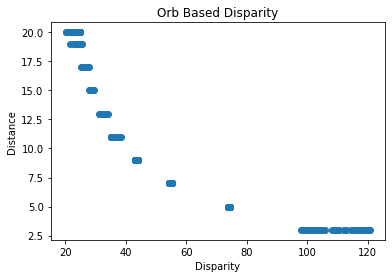

In [12]:
plt.scatter(df.Disparity, df.Distance)
plt.title("Orb Based Disparity")
plt.xlabel("Disparity")
plt.ylabel("Distance")
plt.savefig("/home/aman/Documents/Project/DepthCal/Graphs/orbDisparity(videoFrames)", dpi = 500)
plt.show()

In [13]:
dist = [18, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]

In [25]:
dispDist1 = []

for i in range(1, 17):
    imgL = cv2.imread(path + "left/" + str(i) + ".jpg")
    imgR = cv2.imread(path + "right/" + str(i) + ".jpg")
    
    imgL = cv2.resize(imgL, (480, 720))
    imgR = cv2.resize(imgR, (480, 720))
            
    dis = orb(imgL, imgR)
    if dis>0:
        dispDist1.append({"Disparity" : dis, "Distance" : dist[i-1]})

In [26]:
len(dispDist1)

12

In [27]:
df1 = pd.DataFrame(dispDist1)

In [28]:
df1.head()

,Disparity,Distance
0,19.906555,18
1,19.007996,16
2,25.082291,15
3,25.712662,12
4,26.873871,11


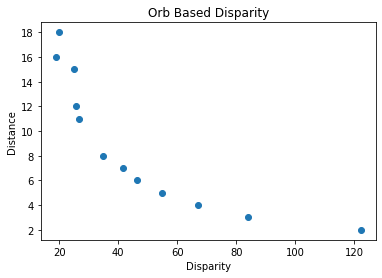

In [29]:
plt.scatter(df1.Disparity, df1.Distance)
plt.title("Orb Based Disparity")
plt.xlabel("Disparity")
plt.ylabel("Distance")
plt.savefig("/home/aman/Documents/Project/DepthCal/Graphs/orbDisparity(Images)", dpi = 500)
plt.show()

In [31]:
df2 = df.append(df1)

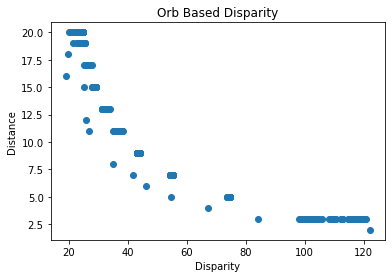

In [32]:
plt.scatter(df2.Disparity, df2.Distance)
plt.title("Orb Based Disparity")
plt.xlabel("Disparity")
plt.ylabel("Distance")
plt.savefig("/home/aman/Documents/Project/DepthCal/Graphs/orbDisparity", dpi = 500)
plt.show()

In [39]:
x = df2.Disparity.values
y = df2.Distance.values

In [40]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

In [42]:
x

array([[101.32627573],
       [ 99.89978557],
       [ 97.95475573],
       ...,
       [ 67.10429001],
       [ 83.99038997],
       [122.13598194]])

In [43]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

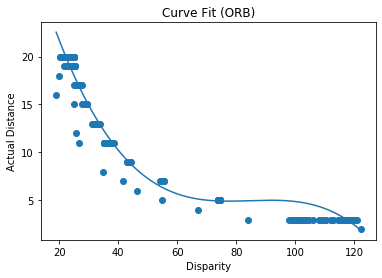

In [44]:
x_grid=np.arange(min(x), max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y)
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)))
plt.title("Curve Fit (ORB)")
plt.xlabel("Disparity")
plt.ylabel("Actual Distance")
plt.show()

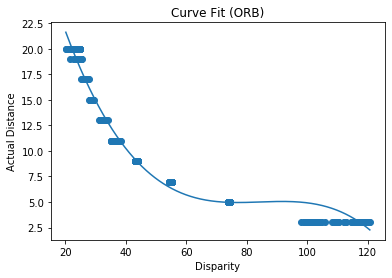

In [68]:
x = df.Disparity.values
y = df.Distance.values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
lin_reg2=LinearRegression()
lin_reg2.fit(x_poly,y)

x_grid=np.arange(min(x), max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)
plt.scatter(x,y)
plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)))
plt.title("Curve Fit (ORB)")
plt.xlabel("Disparity")
plt.ylabel("Actual Distance")
plt.savefig("/home/aman/Documents/Project/DepthCal/Graphs/orbDisparity(Curve Fit)", dpi = 500)
plt.show()

In [62]:
df.Distance.unique()

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 20])

In [63]:
df

,Disparity,Distance
0,101.326276,3
1,99.899786,3
2,97.954756,3
3,99.213396,3
4,100.288256,3
5,101.016347,3
6,100.330935,3
7,100.271131,3
8,100.281557,3
9,98.784675,3


In [64]:
df4 = df[10:50]

In [70]:
df4 = df4.append(df[260:270])
df4 = df4.append(df[370:380])
df4 = df4.append(df[550:560])
df4 = df4.append(df[680:690])
df4 = df4.append(df[880:890])
df4 = df4.append(df[1040:1090])
df4 = df4.append(df[1200:1210])
df4 = df4.append(df[1340:1350])
df4 = df4.append(df[1520:1530])

In [71]:
df4

,Disparity,Distance
10,98.780423,3
11,100.551106,3
12,103.265010,3
13,100.512638,3
14,101.630173,3
15,101.153988,3
16,102.550687,3
17,103.290190,3
18,102.037914,3
19,103.802695,3


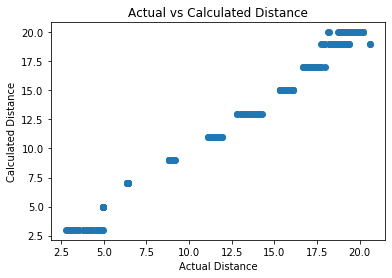

In [73]:
x = df4.Disparity.values
y = df4.Distance.values

x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

plt.scatter(lin_reg2.predict(poly_reg.fit_transform(x)),y)
plt.title("Actual vs Calculated Distance")
plt.ylabel("Calculated Distance")
plt.xlabel("Actual Distance")
plt.savefig("/home/aman/Documents/Project/DepthCal/Graphs/calculatedVsActual", dpi = 500)
plt.show()